<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* customer analysis
* iterator

In [3]:
import pandas as pd 
import numpy as np
import plotnine as gg
from  plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns 
import re 
import os
from datetime import datetime, date, time, timezone, timedelta 

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from collections import defaultdict 
from functools import reduce

# customer analysis

In [4]:
os.listdir()

['.config',
 '1_customers_dataset.csv',
 'ecommerce-data.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'scanner_data.csv',
 '1_orders_dataset.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 '1_order_payments_dataset.csv',
 'online_retail_II.xlsx',
 'mall_customers.csv',
 'test.csv',
 'sample_data']

In [5]:
df = pd.read_csv('mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.columns = [re.sub(' ', '_', re.sub(r' \(.+\)$', '', a)).lower() for a in df.columns]
df.head()

,customerid,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


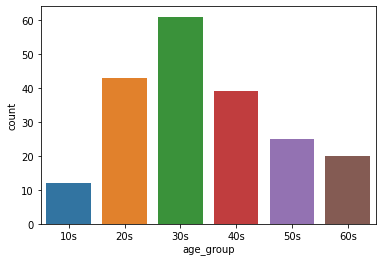

In [35]:
sns.countplot(
    data = df.assign(
    age_group = lambda x : np.select(
        [x.age >= 60, x.age >= 50,x.age >= 40, x.age >= 30, x.age >= 20, x.age >= 10],
        [f'{str(a)}s' for a in range(60, 9, -10) ],
        default = '0s'
        )
    ),
    x = 'age_group',
    order = [f'{str(a)}s' for a in range(10, 61, 10) ]

)

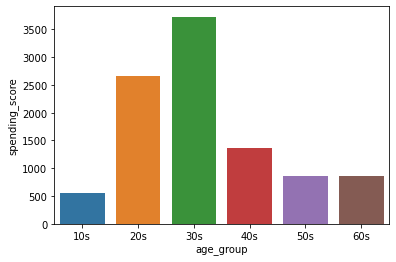

In [38]:
sns.barplot(
    data = df.assign(
    age_group = lambda x : np.select(
        [x.age >= 60, x.age >= 50,x.age >= 40, x.age >= 30, x.age >= 20, x.age >= 10],
        [f'{str(a)}s' for a in range(60, 9, -10) ],
        default = '0s'
        )
    ).groupby('age_group')['spending_score'].sum().reset_index(),
    x = 'age_group', y = 'spending_score'
)

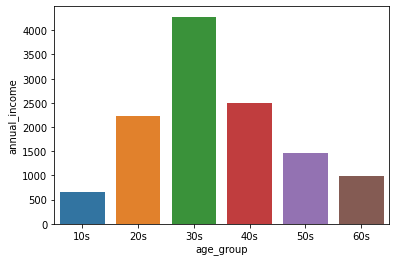

In [39]:
sns.barplot(
    data = df.assign(
    age_group = lambda x : np.select(
        [x.age >= 60, x.age >= 50,x.age >= 40, x.age >= 30, x.age >= 20, x.age >= 10],
        [f'{str(a)}s' for a in range(60, 9, -10) ],
        default = '0s'
        )
    ).groupby('age_group')['annual_income'].sum().reset_index(),
    x = 'age_group', y = 'annual_income'
)

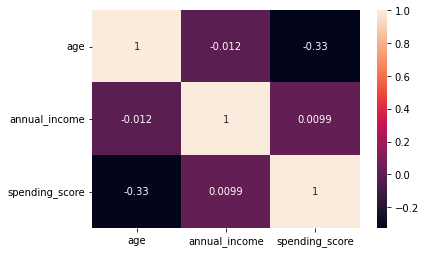

In [7]:
sns.heatmap(df.drop(['customerid'], axis = 1).corr(), annot= True)

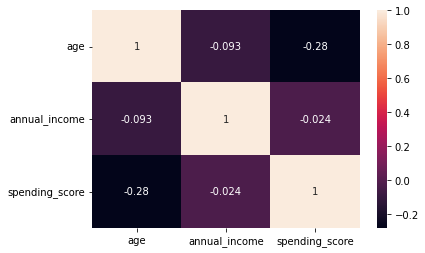

In [9]:
sns.heatmap(df[df.gender == 'Male'].drop(['customerid'], axis = 1).corr(), annot= True)

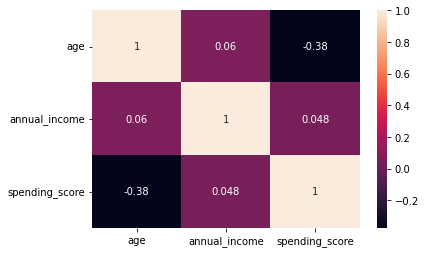

In [10]:
sns.heatmap(df[df.gender == 'Female'].drop(['customerid'], axis = 1).corr(), annot= True)

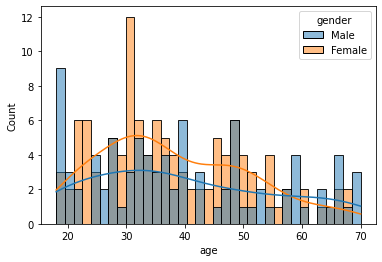

In [11]:
sns.histplot(data = df, x = 'age', hue = 'gender', bins = 35, kde = True)

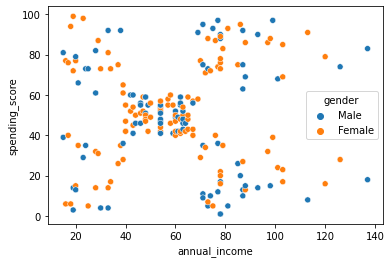

In [46]:
sns.scatterplot(data = df, x = 'annual_income', y = 'spending_score', hue = 'gender')

In [48]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df[['annual_income', 'spending_score']])

In [56]:
km = KMeans(n_clusters = 5, random_state = 10)
km.fit(df_std)
df['flag'] = km.fit_predict(df_std).astype('str')
df.head()

,customerid,gender,age,annual_income,spending_score,flag
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


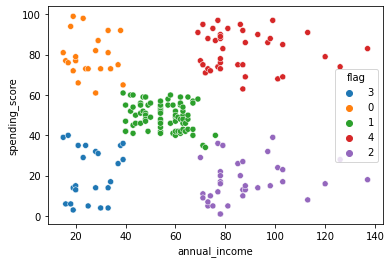

In [57]:
sns.scatterplot(data = df, x = 'annual_income', y = 'spending_score', hue = 'flag')

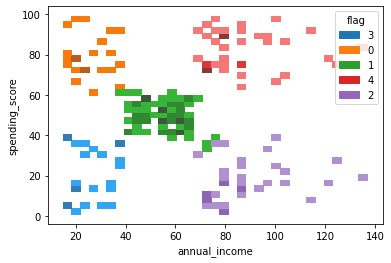

In [64]:
sns.histplot(data = df, x = 'annual_income', y = 'spending_score', hue = 'flag', kde = True, bins = 35)

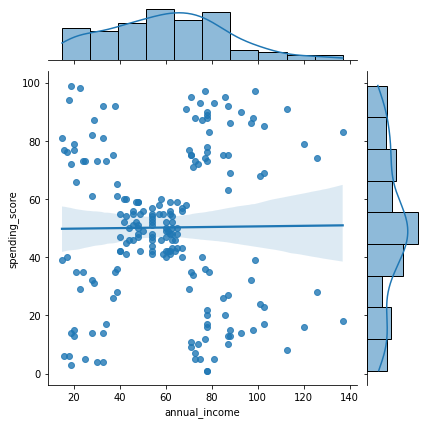

In [68]:
sns.jointplot(data = df, x = 'annual_income', y = 'spending_score', kind = 'reg')

# iterator

In [69]:
mat = [list('ABC'), list('DEF'), list('GHI')]
a = {letter : [r, c] for r, rows in enumerate(mat) for c, letter in enumerate(rows)}

arr = np.empty([3,3], dtype = 'object')
for k, v in a.items() :
  arr[v[0], v[1]] = k
arr

array([['A', 'B', 'C'],
       ['D', 'E', 'F'],
       ['G', 'H', 'I']], dtype=object)

In [91]:
names = np.random.choice(['kim', 'lee', 'park'], 100, replace = True)

def get_score(names) : 
  unique, counts = np.unique(names, return_counts = True)
  dict_count = dict(zip(unique, counts))

  res = list()

  for k, v in dict_count.items() :
    temp_name = k 
    temp_count = v 
    avg = np.random.randint(50, 90, 1)
    std = np.random.randint(10, 20, 1)
    score = [a if a <= 100 else 100 for a in np.random.normal(avg, std, v)]
    res.append(
        pd.DataFrame({'names' : np.repeat(k, v),
                  'score' : score})
    )

  return(pd.concat(res))

res = get_score(names)
res.head()

,names,score
0,kim,89.598531
1,kim,82.167357
2,kim,82.527810
3,kim,91.144593
4,kim,73.026702


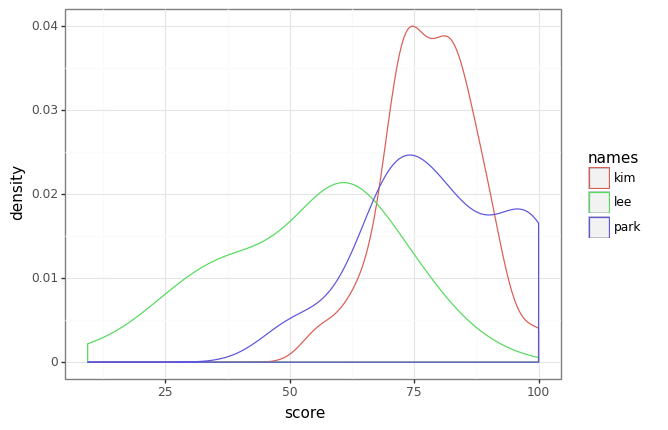

<ggplot: (8758418083085)>

In [93]:
(
    ggplot(res, aes('score', color = 'names')) +
    gg.geom_density() +
    gg.theme_bw()
)